In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
# import data
train_df = pd.read_csv('train.csv')

# EDA

In [4]:
train_df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [5]:
train_df.shape

(37137, 10)

In [6]:
train_df.info

<bound method DataFrame.info of           id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   
0          0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989  \
1          1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084   
2          2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602   
3          3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286   
4          4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790   
...      ...     ...       ...       ...        ...         ...       ...   
37132  37132  3.3438      50.0  4.936508   1.079365      1775.0  3.022222   
37133  37133  3.7308      26.0  5.087533   0.966019      1006.0  4.316901   
37134  37134  4.1716      52.0  4.678862   1.101485      1156.0  1.431734   
37135  37135  2.7143      16.0  5.710074   1.068376       584.0  2.803659   
37136  37136  2.2419      34.0  5.424419   1.058685      1340.0  3.799065   

       Latitude  Longitude  MedHouseVal  
0

## Checking if the dataframe has any kind of missing data

In [7]:
train_df.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Checking if the dataframe has any duplicate values

In [8]:
train_df.duplicated().any()

False

## Checking coorelation

In [9]:
train_df.corr()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,1.000000,0.000312,-0.001248,-0.000506,-0.004370,0.002427,-0.000980,-0.000911,0.001887,-0.001358
MedInc,0.000312,1.000000,-0.080542,0.699994,-0.127169,-0.008552,-0.000885,-0.060463,-0.043742,0.701925
HouseAge,-0.001248,-0.080542,1.000000,-0.156625,-0.056960,-0.235459,-0.002792,0.021071,-0.090394,0.103210
AveRooms,-0.000506,0.699994,-0.156625,1.000000,0.174753,-0.038099,0.023858,0.095169,-0.088184,0.366727
AveBedrms,-0.004370,-0.127169,-0.056960,0.174753,1.000000,-0.007120,-0.009257,0.026142,0.015218,-0.067487
Population,0.002427,-0.008552,-0.235459,-0.038099,-0.007120,1.000000,0.022825,-0.069944,0.071085,-0.038479
AveOccup,-0.000980,-0.000885,-0.002792,0.023858,-0.009257,0.022825,1.000000,-0.032199,0.037118,-0.048475
Latitude,-0.000911,-0.060463,0.021071,0.095169,0.026142,-0.069944,-0.032199,1.000000,-0.937370,-0.116499
Longitude,0.001887,-0.043742,-0.090394,-0.088184,0.015218,0.071085,0.037118,-0.937370,1.000000,-0.056742
MedHouseVal,-0.001358,0.701925,0.103210,0.366727,-0.067487,-0.038479,-0.048475,-0.116499,-0.056742,1.000000


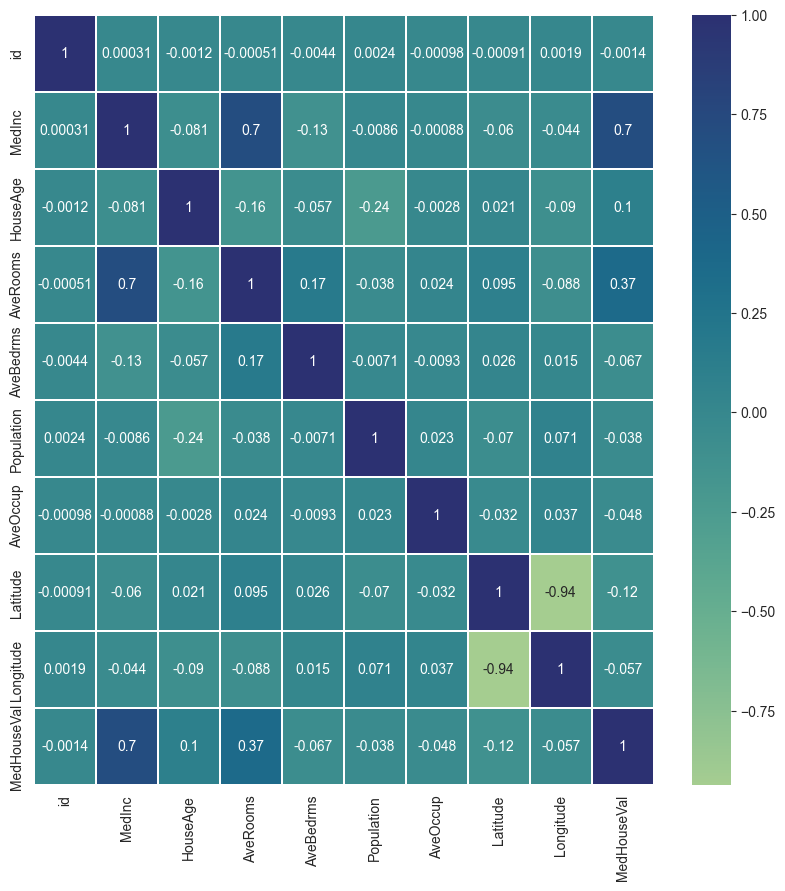

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True,cmap='crest',linewidths=0.2)
plt.show()

In [11]:
X_train = train_df.drop('MedHouseVal',axis=1)
y_train = train_df['MedHouseVal']
X_train.shape,y_train.shape

((37137, 9), (37137,))

## Creating Baseline Model

In [32]:
from sklearn.dummy import DummyRegressor
# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')
# Fit the dummy regressor
dummy.fit(X_train, y_train)
dummy.score(X_train,y_train)

0.0

### As our dummy model isnt giving any accuracy we will consider Linear Regression Model as our baseline

In [33]:
m1 = LinearRegression()
m1.fit(X_train,y_train)
m1.score(X_train,y_train)

0.6040322106934126

#### Our Baseline accuracy is 60%

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
m2 = GradientBoostingRegressor(random_state=1)
m2.fit(X_train,y_train)
m2.score(X_train,y_train)

0.7435682861087352

In [36]:
from sklearn.ensemble import AdaBoostRegressor
m3 = AdaBoostRegressor(random_state=1)
m3.fit(X_train,y_train)
m3.score(X_train,y_train)

0.41305609619590655

In [35]:
from sklearn.ensemble import RandomForestRegressor
m4 = RandomForestRegressor(random_state=1)
m4.fit(X_train,y_train)
m4.score(X_train,y_train)

0.9631830657993908

As the rando

# Hyperparameter Tuning
### As randomforest with default parameters is getting accuracy more than other models we are gonna tune the parameters of random forest

In [39]:
def plot_depth_accuracy_graph(X_train, y_train, max_depth, n_estimators=100, random_state=1):
    '''
    Creates a graph of accuracy vs depth of Random Forest Classifier to know optimal depth
    '''
    depths = []
    accuracies = []

    for depth in range(1, max_depth + 1,50):
        clf = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=random_state,n_jobs=-1)
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_train, y_train)

        depths.append(depth)
        accuracies.append(accuracy)

    max_accuracy = max(accuracies)
    max_accuracy_depth = depths[accuracies.index(max_accuracy)]

    plt.plot(depths, accuracies, '-o')
    plt.axvline(x=max_accuracy_depth, color='r', linestyle='--', label='Max Accuracy')

    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Accuracy vs. Max Depth')
    plt.legend()
    plt.show()


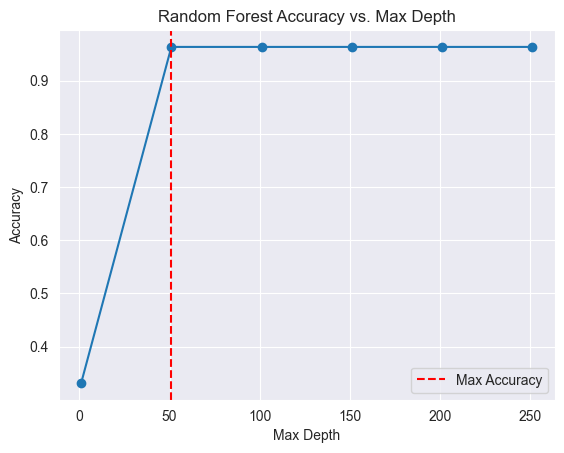

In [40]:
plot_depth_accuracy_graph(X_train,y_train,max_depth=300)

#### So 50 is the optimal depth of the RandomForest's trees

In [45]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor(random_state=1,n_jobs=-1,max_depth=50)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100,200,300,400],
    'max_features': ['sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_features': 'sqrt', 'n_estimators': 400}
Best score:  -0.34799271227459566


# Hyperparameter tuned RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
m4 = RandomForestRegressor(max_depth = 50,max_features='sqrt',n_estimators=400, random_state=1)
m4.fit(X_train,y_train)
m4.score(X_train,y_train)

0.9653967346752469

# Evaluation Metrics

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def display_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)']
    scores = [mse, mae, r2]

    data = {'Metric': metrics, 'Score': scores}
    df = pd.DataFrame(data)

    print(df)

y_pred = m4.predict(X_train)
display_regression_metrics(y_train,y_pred)

                      Metric     Score
0   Mean Squared Error (MSE)  0.046446
1  Mean Absolute Error (MAE)  0.152862
2             R-squared (R2)  0.965397
